In [1]:
import os
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import seaborn as sns

In [62]:
import sqlite3 

In [3]:
os.chdir("E:\\gramener\\gramener-usecase-census")

In [4]:
census =pd.read_csv("india-districts-census-2011.csv")

In [5]:
census.head()

,District code,State name,District name,Population,Male,Female,Literate,Male_Literate,Female_Literate,SC,...,Power_Parity_Rs_90000_150000,Power_Parity_Rs_45000_150000,Power_Parity_Rs_150000_240000,Power_Parity_Rs_240000_330000,Power_Parity_Rs_150000_330000,Power_Parity_Rs_330000_425000,Power_Parity_Rs_425000_545000,Power_Parity_Rs_330000_545000,Power_Parity_Above_Rs_545000,Total_Power_Parity
0,1,JAMMU & KASHMIR,Kupwara,870354,474190,396164,439654,282823,156831,1048,...,94,588,71,101,172,74,10,84,15,1119
1,2,JAMMU & KASHMIR,Badgam,753745,398041,355704,335649,207741,127908,368,...,126,562,72,89,161,96,28,124,18,1066
2,3,JAMMU & KASHMIR,Leh(Ladakh),133487,78971,54516,93770,62834,30936,488,...,46,122,15,22,37,20,14,34,17,242
3,4,JAMMU & KASHMIR,Kargil,140802,77785,63017,86236,56301,29935,18,...,27,114,12,18,30,19,3,22,7,214
4,5,JAMMU & KASHMIR,Punch,476835,251899,224936,261724,163333,98391,556,...,78,346,35,50,85,59,8,67,12,629


In [6]:
census.shape

(640, 118)

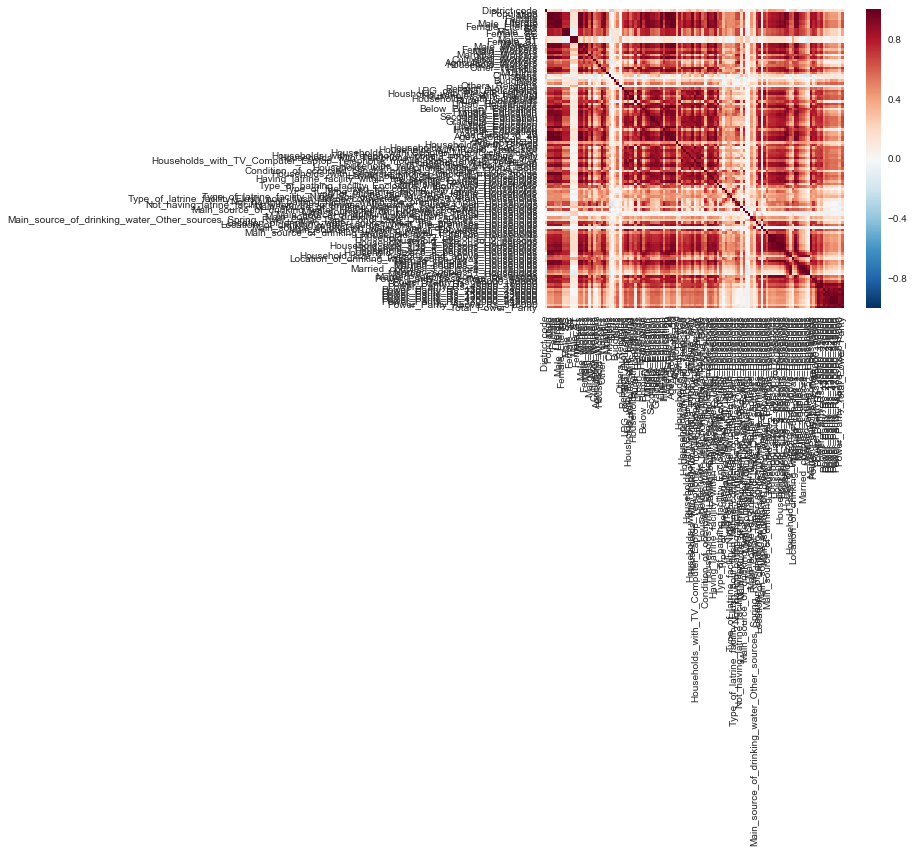

In [7]:
sns.heatmap(census.corr(),vmax= True,square=True)

In [6]:
census.dtypes

District code                                                  int64
State name                                                    object
District name                                                 object
Population                                                     int64
Male                                                           int64
Female                                                         int64
Literate                                                       int64
Male_Literate                                                  int64
Female_Literate                                                int64
SC                                                             int64
Male_SC                                                        int64
Female_SC                                                      int64
ST                                                             int64
Male_ST                                                        int64
Female_ST                         

In [7]:
census["State_name"] = census["State name"]
del census["State name"]

In [8]:
census = census.rename(columns={'District name': 'District_name'})

In [10]:
census.State_name.astype("category").value_counts()

UTTAR PRADESH                71
MADHYA PRADESH               50
BIHAR                        38
MAHARASHTRA                  35
RAJASTHAN                    33
TAMIL NADU                   32
ODISHA                       30
KARNATAKA                    30
ASSAM                        27
GUJARAT                      26
JHARKHAND                    24
ANDHRA PRADESH               23
JAMMU & KASHMIR              22
HARYANA                      21
PUNJAB                       20
WEST BENGAL                  19
CHHATTISGARH                 18
ARUNACHAL PRADESH            16
KERALA                       14
UTTARAKHAND                  13
HIMACHAL PRADESH             12
NAGALAND                     11
NCT OF DELHI                  9
MANIPUR                       9
MIZORAM                       8
MEGHALAYA                     7
PUDUCHERRY                    4
SIKKIM                        4
TRIPURA                       4
ANDAMAN & NICOBAR ISLANDS     3
DAMAN & DIU                   2
GOA     

In [39]:
# to find the missing values in the data
census.isnull().sum().sum()

0

In [56]:
#to find the literacy rate of each state

census_lit = census[["State_name","District_name","Literate"]]


In [61]:
census_lit.head()

,State_name,District_name,Literate
0,JAMMU & KASHMIR,Kupwara,439654
1,JAMMU & KASHMIR,Badgam,335649
2,JAMMU & KASHMIR,Leh(Ladakh),93770
3,JAMMU & KASHMIR,Kargil,86236
4,JAMMU & KASHMIR,Punch,261724
5,JAMMU & KASHMIR,Rajouri,364109
6,JAMMU & KASHMIR,Kathua,389204
7,JAMMU & KASHMIR,Baramula,545149
8,JAMMU & KASHMIR,Bandipore,185979
9,JAMMU & KASHMIR,Srinagar,748584


In [60]:
census_lit = census_lit.groupby(['State_name','District_name'])

In [ ]:
sql_command = """
from table Census_lit(sum(Literate) as)

In [64]:
import pandasql as pdsql

In [9]:
%load_ext sql

In [10]:
try:
   import pymysql
   pymysql.install_as_MySQLdb()
except ImportError:
   pass

In [11]:
%sql select * From cesus where State_name="TAMIL NADU"

Exception: Format: (postgresql|mysql)://username:password@hostname/dbname, or one of dict_keys([])

In [21]:
#sSQL Qerry
SELECT *FROM census;

SyntaxError: invalid syntax (<ipython-input-21-d52673e130b1>, line 2)

In [24]:
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

In [25]:
pysqldf ("Select * from census where State_name ='PUDUCHERRY'")

,District code,District_name,Population,Male,Female,Literate,Male_Literate,Female_Literate,SC,Male_SC,...,Power_Parity_Rs_45000_150000,Power_Parity_Rs_150000_240000,Power_Parity_Rs_240000_330000,Power_Parity_Rs_150000_330000,Power_Parity_Rs_330000_425000,Power_Parity_Rs_425000_545000,Power_Parity_Rs_330000_545000,Power_Parity_Above_Rs_545000,Total_Power_Parity,State_name
0,634,Yanam,55626,27301,28325,39274,19919,19355,8427,4100,...,4309,1370,838,2208,576,978,1554,1446,10027,PUDUCHERRY
1,635,Puducherry,950289,468258,482031,726649,380946,345703,152406,74129,...,4309,1370,838,2208,576,978,1554,1446,10027,PUDUCHERRY
2,636,Mahe,41816,19143,22673,36470,16610,19860,144,77,...,4309,1370,838,2208,576,978,1554,1446,10027,PUDUCHERRY
3,637,Karaikal,200222,97809,102413,154916,79903,75013,35348,17206,...,2408,665,340,1005,246,483,729,341,4890,PUDUCHERRY


In [40]:
pysqldf("SELECT sum(Literate) FROM census  Group by 'State_name' = 'literacy_rate'")

,sum(Literate)
0,763638812


In [43]:
group_state = census.groupby('State_name').sum()

In [44]:
group_state.head(10)

,District code,Population,Male,Female,Literate,Male_Literate,Female_Literate,SC,Male_SC,Female_SC,...,Power_Parity_Rs_90000_150000,Power_Parity_Rs_45000_150000,Power_Parity_Rs_150000_240000,Power_Parity_Rs_240000_330000,Power_Parity_Rs_150000_330000,Power_Parity_Rs_330000_425000,Power_Parity_Rs_425000_545000,Power_Parity_Rs_330000_545000,Power_Parity_Above_Rs_545000,Total_Power_Parity
State_name,,,,,,,,,,,,,,,,,,,,,
ANDAMAN & NICOBAR ISLANDS,1917,380581,202871,177710,294281,164377,129904,0,0,0,...,2741,6810,1073,636,1709,405,737,1142,544,12084
ANDHRA PRADESH,12489,84580777,42442146,42138631,50556760,28251243,22305517,13878078,6913047,6965031,...,34248,80360,5183,3090,8273,3771,5385,9156,6449,124166
ARUNACHAL PRADESH,4040,1383727,713912,669815,766005,439868,326137,0,0,0,...,1486,4158,556,396,952,141,153,294,172,6456
ASSAM,8451,31205576,15939443,15266133,19177977,10568639,8609338,2231321,1145314,1086007,...,2095,6406,834,590,1424,195,207,402,202,9944
BIHAR,8417,104099452,54278157,49821295,52504553,31608023,20896530,16567325,8606253,7961072,...,18132,55371,6168,564,6732,788,1273,2061,1576,89490
CHANDIGARH,55,1055450,580663,474787,805438,465346,340092,199086,106356,92730,...,7152,10783,4285,2444,6729,3382,4461,7843,7897,34145
CHHATTISGARH,7353,25545198,12832895,12712303,15379922,8807893,6572029,3274269,1641738,1632531,...,8485,19526,1643,749,2392,613,956,1569,1263,30603
DADRA & NAGAR HAVELI,496,343709,193760,149949,223230,142521,80709,6186,3339,2847,...,1667,3449,407,564,971,729,978,1707,235,6793
DAMAN & DIU,989,243247,150301,92946,188406,124643,63763,6124,3151,2973,...,14304,21566,8570,4888,13458,6764,8922,15686,15794,68290


In [45]:
group_state['literacy_rate'] = group_state['Literate'] / group_state['Population']

In [46]:
group_state.head(10)

,District code,Population,Male,Female,Literate,Male_Literate,Female_Literate,SC,Male_SC,Female_SC,...,Power_Parity_Rs_45000_150000,Power_Parity_Rs_150000_240000,Power_Parity_Rs_240000_330000,Power_Parity_Rs_150000_330000,Power_Parity_Rs_330000_425000,Power_Parity_Rs_425000_545000,Power_Parity_Rs_330000_545000,Power_Parity_Above_Rs_545000,Total_Power_Parity,literacy_rate
State_name,,,,,,,,,,,,,,,,,,,,,
ANDAMAN & NICOBAR ISLANDS,1917,380581,202871,177710,294281,164377,129904,0,0,0,...,6810,1073,636,1709,405,737,1142,544,12084,0.773241
ANDHRA PRADESH,12489,84580777,42442146,42138631,50556760,28251243,22305517,13878078,6913047,6965031,...,80360,5183,3090,8273,3771,5385,9156,6449,124166,0.597733
ARUNACHAL PRADESH,4040,1383727,713912,669815,766005,439868,326137,0,0,0,...,4158,556,396,952,141,153,294,172,6456,0.553581
ASSAM,8451,31205576,15939443,15266133,19177977,10568639,8609338,2231321,1145314,1086007,...,6406,834,590,1424,195,207,402,202,9944,0.614569
BIHAR,8417,104099452,54278157,49821295,52504553,31608023,20896530,16567325,8606253,7961072,...,55371,6168,564,6732,788,1273,2061,1576,89490,0.504369
CHANDIGARH,55,1055450,580663,474787,805438,465346,340092,199086,106356,92730,...,10783,4285,2444,6729,3382,4461,7843,7897,34145,0.763123
CHHATTISGARH,7353,25545198,12832895,12712303,15379922,8807893,6572029,3274269,1641738,1632531,...,19526,1643,749,2392,613,956,1569,1263,30603,0.602067
DADRA & NAGAR HAVELI,496,343709,193760,149949,223230,142521,80709,6186,3339,2847,...,3449,407,564,971,729,978,1707,235,6793,0.649474
DAMAN & DIU,989,243247,150301,92946,188406,124643,63763,6124,3151,2973,...,21566,8570,4888,13458,6764,8922,15686,15794,68290,0.774546


In [47]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'mpl_toolkits.basemap'